# DATA 602: Midterm Project

## Team Members:
* Priyanka Anumandla(XR74050)
* Siddhidhatri Rohith Reddy(LO55859)
* Lavanya Mamillapalli(QW21097)

In [1]:
# Importing Packages
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, norm

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the Dataset
df = pd.read_csv("dataset_newsletter.csv")

In [4]:
# Checking the Target values
df.category.nunique()

12

In [5]:
# Identifying the Target values
df.category.unique()

array(['ANNOUNCEMENTS', 'UPCOMING EVENTS', 'BREAKING NEWS', 'FIELD TRIPS',
       'PTO', 'VOLUNTEERS NEEDED', 'DONATIONS NEEDED', 'ATHLETICS',
       'IMPORTANT NEWS', 'ACHIEVEMENTS', 'STUDENT THOUGHTS', 'CLUBS'],
      dtype=object)

In [6]:
df.category.value_counts()

ANNOUNCEMENTS        10240
BREAKING NEWS         3649
UPCOMING EVENTS       3055
PTO                   1507
IMPORTANT NEWS         452
CLUBS                  363
ATHLETICS              170
DONATIONS NEEDED        63
FIELD TRIPS             53
VOLUNTEERS NEEDED       27
ACHIEVEMENTS            25
STUDENT THOUGHTS         3
Name: category, dtype: int64

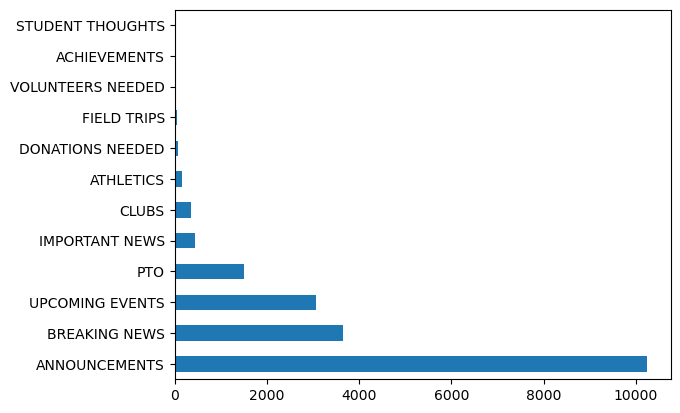

In [7]:
# Horizontal Bar chart for detail understanding of Category column
df['category'].value_counts().plot(kind='barh')
plt.show()

In [8]:
df

,Unnamed: 0,title,body,signature,submissiontime,category
0,0,Mrs. Laurence Class,"Because of the upcoming holiday, we will be re...",Jaslynn Laurence,11/18/15 9:26 AM,ANNOUNCEMENTS
1,1,Mr. Valle's Winter Break Packets (Cornell/Hamp...,"All my Cornell, Hampton, and Princeton student...",Mr. Sam Valle,12/16/15 9:26 PM,ANNOUNCEMENTS
2,2,Hours of Operation,"Parents/Guardians, We will gladly assist yo...",Ms. Ellis,11/18/15 3:30 PM,ANNOUNCEMENTS
3,3,Character Education,CMIT South scholars will continue to work on v...,Ch.Ed. Team Room 163,11/15/15 4:49 PM,ANNOUNCEMENTS
4,4,CMIT Students Connecting with Students Around ...,A couple of classes have had the opportunity t...,Srta. Dickerson,11/16/15 5:21 AM,ANNOUNCEMENTS
...,...,...,...,...,...,...
19602,19602,Ms. Coholic's Science Classes,"Hello all! This week, BioGeoChem students wil...",Suzanne Coholic High School Science Teacher S...,1/11/23 10:28 AM,ANNOUNCEMENTS
19603,19603,AP Exams,Clock is ticking and we have four months until...,Nabil Siddiqui,1/13/23 9:43 AM,ANNOUNCEMENTS
19604,19604,Ever thought of becoming a Software Engineer?,This after school club can benefit all the com...,Nabil Siddiqui,1/13/23 9:49 AM,CLUBS
19605,19605,Last Call! Women's Lacrosse Interest,Last Call! The Women's Lacrosse Program is hav...,Serey Sok CMIT Women's Lacrosse & Women's Socc...,1/15/23 8:29 PM,CLUBS


In [9]:
# Dropping unneccesary column
df = df.iloc[: , 1:]
df

,title,body,signature,submissiontime,category
0,Mrs. Laurence Class,"Because of the upcoming holiday, we will be re...",Jaslynn Laurence,11/18/15 9:26 AM,ANNOUNCEMENTS
1,Mr. Valle's Winter Break Packets (Cornell/Hamp...,"All my Cornell, Hampton, and Princeton student...",Mr. Sam Valle,12/16/15 9:26 PM,ANNOUNCEMENTS
2,Hours of Operation,"Parents/Guardians, We will gladly assist yo...",Ms. Ellis,11/18/15 3:30 PM,ANNOUNCEMENTS
3,Character Education,CMIT South scholars will continue to work on v...,Ch.Ed. Team Room 163,11/15/15 4:49 PM,ANNOUNCEMENTS
4,CMIT Students Connecting with Students Around ...,A couple of classes have had the opportunity t...,Srta. Dickerson,11/16/15 5:21 AM,ANNOUNCEMENTS
...,...,...,...,...,...
19602,Ms. Coholic's Science Classes,"Hello all! This week, BioGeoChem students wil...",Suzanne Coholic High School Science Teacher S...,1/11/23 10:28 AM,ANNOUNCEMENTS
19603,AP Exams,Clock is ticking and we have four months until...,Nabil Siddiqui,1/13/23 9:43 AM,ANNOUNCEMENTS
19604,Ever thought of becoming a Software Engineer?,This after school club can benefit all the com...,Nabil Siddiqui,1/13/23 9:49 AM,CLUBS
19605,Last Call! Women's Lacrosse Interest,Last Call! The Women's Lacrosse Program is hav...,Serey Sok CMIT Women's Lacrosse & Women's Socc...,1/15/23 8:29 PM,CLUBS


## Cleaning

In [10]:
# Checking the datatypes
df.dtypes

title             object
body              object
signature         object
submissiontime    object
category          object
dtype: object

In [11]:
# Coverting into Original Datatypes
df.title = df.title.astype('string')
df.body = df.body.astype('string')
df.signature = df.signature.astype('string')
df.submissiontime = pd.to_datetime(df.submissiontime)
df.category = df.category.astype('string')

In [12]:
# Checking if they are coverted or not
df.dtypes

title                     string
body                      string
signature                 string
submissiontime    datetime64[ns]
category                  string
dtype: object

In [13]:
#Displaying each column unique values count
df.nunique()

title             12358
body              16358
signature          2844
submissiontime    17778
category             12
dtype: int64

In [14]:
#Checking for null values in each column
df.isnull().sum()

title              10
body                3
signature         400
submissiontime      0
category            0
dtype: int64

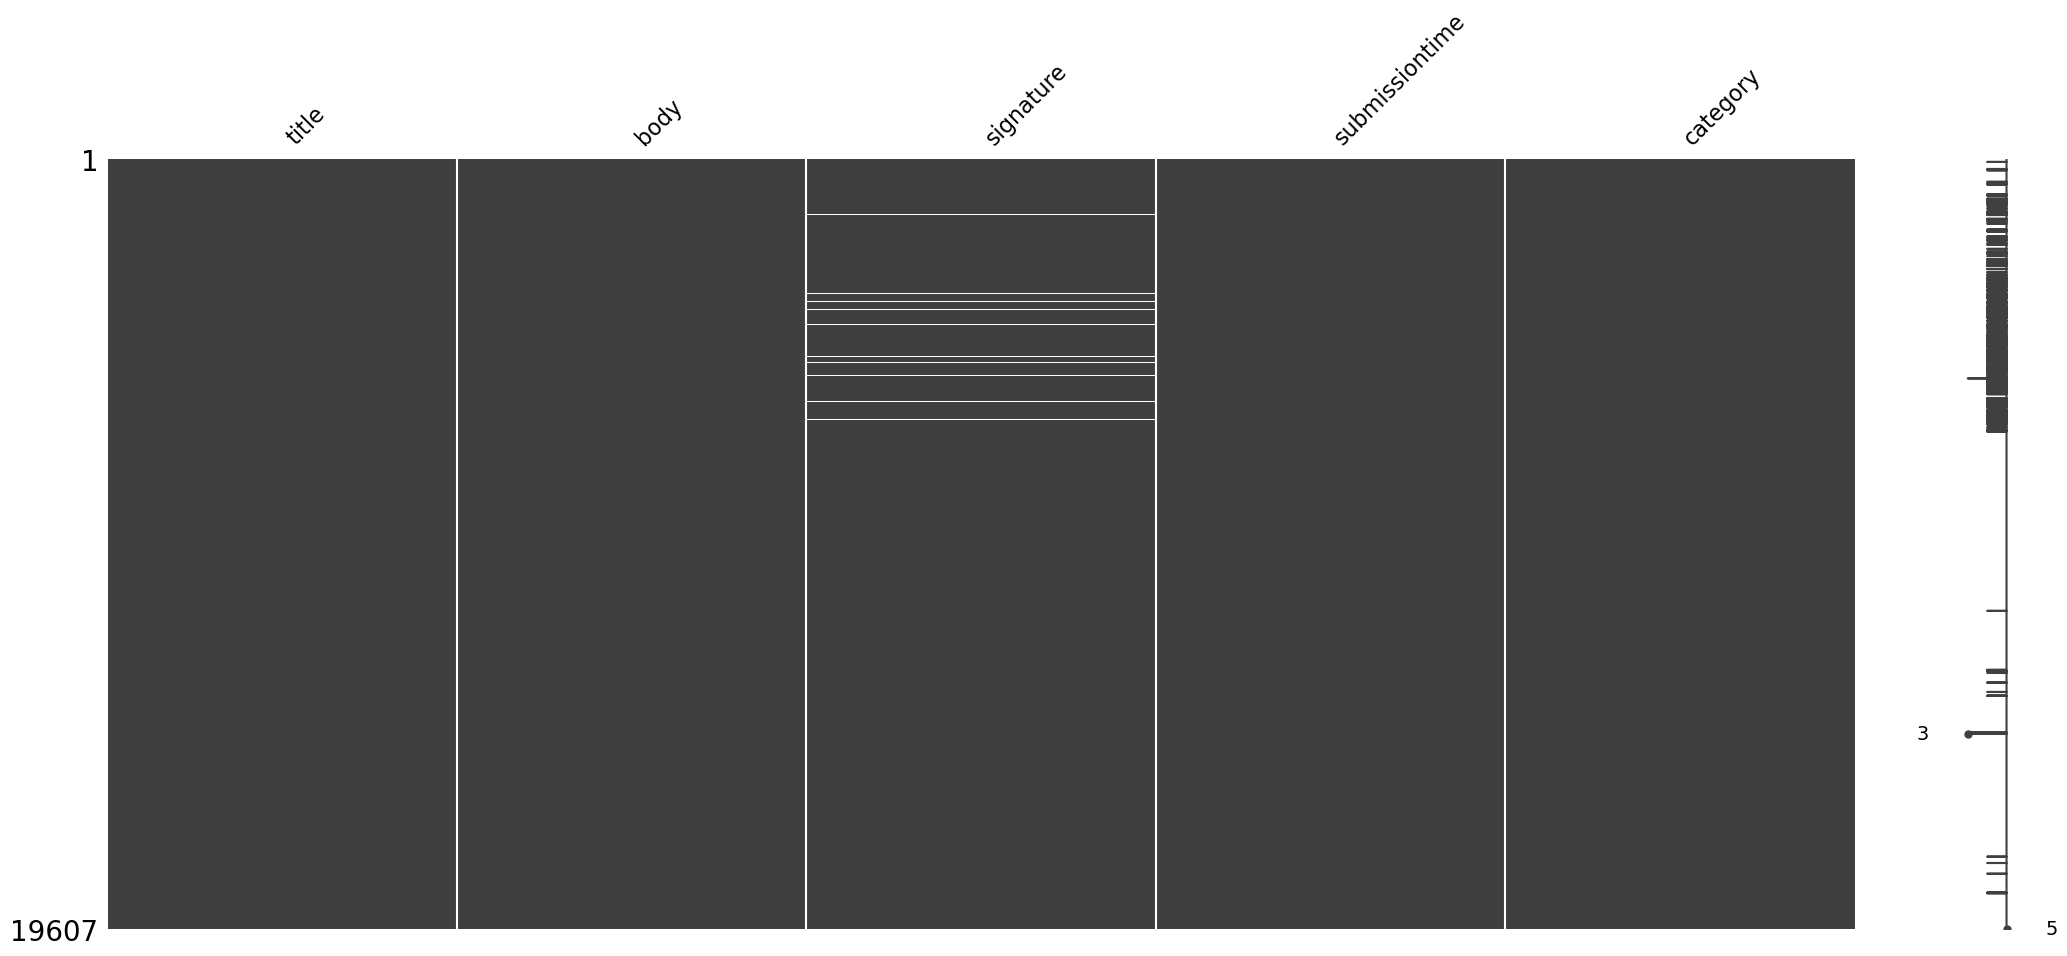

In [15]:
# Plotting the null values
msno.matrix(df)
plt.show()

### Handling Missing Values

In [16]:
# Replace null values with a text 'missing'
df['title'] = df['title'].fillna('missing title')
df['body'] = df['body'].fillna('missing body')
df['signature'] = df['signature'].fillna('Unknown')
df

,title,body,signature,submissiontime,category
0,Mrs. Laurence Class,"Because of the upcoming holiday, we will be re...",Jaslynn Laurence,2015-11-18 09:26:00,ANNOUNCEMENTS
1,Mr. Valle's Winter Break Packets (Cornell/Hamp...,"All my Cornell, Hampton, and Princeton student...",Mr. Sam Valle,2015-12-16 21:26:00,ANNOUNCEMENTS
2,Hours of Operation,"Parents/Guardians, We will gladly assist yo...",Ms. Ellis,2015-11-18 15:30:00,ANNOUNCEMENTS
3,Character Education,CMIT South scholars will continue to work on v...,Ch.Ed. Team Room 163,2015-11-15 16:49:00,ANNOUNCEMENTS
4,CMIT Students Connecting with Students Around ...,A couple of classes have had the opportunity t...,Srta. Dickerson,2015-11-16 05:21:00,ANNOUNCEMENTS
...,...,...,...,...,...
19602,Ms. Coholic's Science Classes,"Hello all! This week, BioGeoChem students wil...",Suzanne Coholic High School Science Teacher S...,2023-01-11 10:28:00,ANNOUNCEMENTS
19603,AP Exams,Clock is ticking and we have four months until...,Nabil Siddiqui,2023-01-13 09:43:00,ANNOUNCEMENTS
19604,Ever thought of becoming a Software Engineer?,This after school club can benefit all the com...,Nabil Siddiqui,2023-01-13 09:49:00,CLUBS
19605,Last Call! Women's Lacrosse Interest,Last Call! The Women's Lacrosse Program is hav...,Serey Sok CMIT Women's Lacrosse & Women's Socc...,2023-01-15 20:29:00,CLUBS


In [17]:
# Checking for null values
df.isnull().sum()

title             0
body              0
signature         0
submissiontime    0
category          0
dtype: int64

### Machine learning techniques

#### Train and test

In [18]:
df

,title,body,signature,submissiontime,category
0,Mrs. Laurence Class,"Because of the upcoming holiday, we will be re...",Jaslynn Laurence,2015-11-18 09:26:00,ANNOUNCEMENTS
1,Mr. Valle's Winter Break Packets (Cornell/Hamp...,"All my Cornell, Hampton, and Princeton student...",Mr. Sam Valle,2015-12-16 21:26:00,ANNOUNCEMENTS
2,Hours of Operation,"Parents/Guardians, We will gladly assist yo...",Ms. Ellis,2015-11-18 15:30:00,ANNOUNCEMENTS
3,Character Education,CMIT South scholars will continue to work on v...,Ch.Ed. Team Room 163,2015-11-15 16:49:00,ANNOUNCEMENTS
4,CMIT Students Connecting with Students Around ...,A couple of classes have had the opportunity t...,Srta. Dickerson,2015-11-16 05:21:00,ANNOUNCEMENTS
...,...,...,...,...,...
19602,Ms. Coholic's Science Classes,"Hello all! This week, BioGeoChem students wil...",Suzanne Coholic High School Science Teacher S...,2023-01-11 10:28:00,ANNOUNCEMENTS
19603,AP Exams,Clock is ticking and we have four months until...,Nabil Siddiqui,2023-01-13 09:43:00,ANNOUNCEMENTS
19604,Ever thought of becoming a Software Engineer?,This after school club can benefit all the com...,Nabil Siddiqui,2023-01-13 09:49:00,CLUBS
19605,Last Call! Women's Lacrosse Interest,Last Call! The Women's Lacrosse Program is hav...,Serey Sok CMIT Women's Lacrosse & Women's Socc...,2023-01-15 20:29:00,CLUBS


In [19]:
# Splitting the target values
features = [x for x in df.columns if x != 'category']
y = df['category']
X = df[features]

In [20]:
# Identifying the target values
y

0        ANNOUNCEMENTS
1        ANNOUNCEMENTS
2        ANNOUNCEMENTS
3        ANNOUNCEMENTS
4        ANNOUNCEMENTS
             ...      
19602    ANNOUNCEMENTS
19603    ANNOUNCEMENTS
19604            CLUBS
19605            CLUBS
19606            CLUBS
Name: category, Length: 19607, dtype: string

In [21]:
# Splitting the train and test values
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=124)
print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')

Records in training data: 15,685
Records in test data: 3,922


In [22]:
# Identifying columns into Numerical and Categorical features
numerical_features = ['submissiontime']
categorical_features = ['title','body', 'signature']

In [23]:
# Importing required Pipelining packages
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Defining and Pipelining Numerical Features
num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])

In [24]:
# Defining and Pipelining Categorical Features
cat_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore'))])

In [25]:
# Applying the pipelining and transforming both Numeric and Categorical features
processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, numerical_features),
                                                      ('create_dummies', cat_pipeline, categorical_features)])
print(processing_pipeline)

ColumnTransformer(transformers=[('proc_numeric',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize_num',
                                                  StandardScaler())]),
                                 ['submissiontime']),
                                ('create_dummies',
                                 Pipeline(steps=[('impute_missing_cats',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('create_dummies_cats',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['title', 'body', 'signature'])])


In [26]:
# Label Encoding the Targetvalues as there are 12 unique targets
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)


### Linear Regression:

In [27]:
# Applying Linear Regression 
from sklearn import linear_model
lin_reg_model = linear_model.LinearRegression()

lin_reg_model_pipeline = Pipeline([('preprocess', processing_pipeline),
                          ('classifier', lin_reg_model)])
# fitting the linear model for taring and testing data
lin_reg_model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['submissiontime']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
    

In [28]:
# Training Score
lin_reg_model_pipeline.score(X_train, y_train)

0.9667177927881648

In [29]:
# Testing Score
lin_reg_model_pipeline.score(X_test, y_test)

0.43087907279239934

### Logistic Regression

In [30]:
# Applying Logistic regression
from sklearn.linear_model import LogisticRegression
logical_reg_model = LogisticRegression()
logical_reg_model_pipeline = Pipeline([('preprocess', processing_pipeline),
                          ('classifier', logical_reg_model)])

logical_reg_model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['submissiontime']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
    

In [31]:
y_log_train = logical_reg_model_pipeline.predict(X_train)
y_log_test = logical_reg_model_pipeline.predict(X_test)

In [32]:
# Model Evaluation based on Accuracy score
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train, y_log_train)
test_acc = accuracy_score(y_test, y_log_test)

print("Training accuracy:", train_acc)
print("Test accuracy:", test_acc)

Training accuracy: 0.9584316225693338
Test accuracy: 0.7332993370729219


In [33]:
from sklearn.model_selection import KFold, cross_val_score


logical_reg_model = LogisticRegression(max_iter=1000)
logical_reg_model_pipeline = Pipeline([('preprocess', processing_pipeline),
                          ('classifier', logical_reg_model)])
n_folds = 3

# Define the cross-validation technique
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
scores = cross_val_score(logical_reg_model_pipeline, X, y, cv=kf, scoring='accuracy')

# Print the mean and standard deviation of the scores
print(f"Accuracy: {np.mean(scores):.2f} (+/- {np.std(scores):.2f})")

Accuracy: 0.72 (+/- 0.01)


### Decisiontree

In [34]:
# Applying Desicion Tree
from sklearn import tree
dec_tree_model = tree.DecisionTreeClassifier()
dec_tree_model_pipeline = Pipeline([('preprocess', processing_pipeline),
                          ('classifier', dec_tree_model)])
# Fitting the Desicion Tree
dec_tree_model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['submissiontime']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
    

In [35]:
y_dec_train = dec_tree_model_pipeline.predict(X_train)
y_dec_test = dec_tree_model_pipeline.predict(X_test)

In [36]:
# Model Evaluation using Accuracy score

train_acc = accuracy_score(y_train, y_dec_train)
test_acc = accuracy_score(y_test, y_dec_test)

print("Training accuracy:", train_acc)
print("Test accuracy:", test_acc)

Training accuracy: 0.9963659547338222
Test accuracy: 0.7488526262111168


In [37]:
from sklearn.model_selection import KFold, cross_val_score

n_folds = 3

# Define the cross-validation technique
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
scores = cross_val_score(dec_tree_model_pipeline, X, y, cv=kf, scoring='accuracy')

# Print the mean and standard deviation of the scores
print(f"Accuracy: {np.mean(scores):.2f} (+/- {np.std(scores):.2f})")

Accuracy: 0.72 (+/- 0.01)


### SVM

In [38]:
# Applying SVM
from sklearn.svm import SVC
SVM_model = SVC()
SVM_model_pipeline = Pipeline([('preprocess', processing_pipeline),
                          ('classifier', SVM_model)])
# Fitting the SVM
SVM_model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['submissiontime']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
    

In [39]:
y_svm_train = SVM_model_pipeline.predict(X_train)
y_svm_test = SVM_model_pipeline.predict(X_test)

In [40]:
# Model Evaluation using Accuracy score

train_acc = accuracy_score(y_train, y_svm_train)
test_acc = accuracy_score(y_test, y_svm_test)

print("Training accuracy:", train_acc)
print("Test accuracy:", test_acc)

Training accuracy: 0.9127829136117309
Test accuracy: 0.7266700662927078


In [41]:
from sklearn.model_selection import KFold, cross_val_score

n_folds = 3

# Define the cross-validation technique
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
scores = cross_val_score(SVM_model_pipeline, X, y, cv=kf, scoring='accuracy')

# Print the mean and standard deviation of the scores
print(f"Accuracy: {np.mean(scores):.2f} (+/- {np.std(scores):.2f})")

Accuracy: 0.71 (+/- 0.01)


### RandomForest

In [42]:
# Applying the RandomForest
from sklearn.ensemble import RandomForestClassifier
rand_for_model = RandomForestClassifier(n_estimators=20)
rand_for_model_pipeline = Pipeline([('preprocess', processing_pipeline),
                          ('classifier', rand_for_model)])
# fitting the Random Forest
rand_for_model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['submissiontime']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
    

In [43]:
y_ranf_train = rand_for_model_pipeline.predict(X_train)
y_ranf_test = rand_for_model_pipeline.predict(X_test)

In [44]:
# Model Evaluation using Accuracy score
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train, y_ranf_train)
test_acc = accuracy_score(y_test, y_ranf_test)

print("Training accuracy:", train_acc)
print("Test accuracy:", test_acc)

Training accuracy: 0.9836149187121453
Test accuracy: 0.7394186639469659


In [45]:
from sklearn.model_selection import KFold, cross_val_score

n_folds = 3

# Define the cross-validation technique
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
scores = cross_val_score(rand_for_model_pipeline, X, y, cv=kf, scoring='accuracy')

# Print the mean and standard deviation of the scores
print(f"Accuracy: {np.mean(scores):.2f} (+/- {np.std(scores):.2f})")

Accuracy: 0.72 (+/- 0.01)


### Hyper parameter Tuning (GridSearchCV)

In [46]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
}

# Define the GridSearchCV object
grid_search = GridSearchCV(dec_tree_model_pipeline, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object on the training data
gcv_results=grid_search.fit(X_train, y_train)

print(gcv_results)

# Print the best parameters and the corresponding score
# print("Best parameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('proc_numeric',
                                                                         Pipeline(steps=[('impute_missing',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardize_num',
                                                                                          StandardScaler())]),
                                                                         ['submissiontime']),
                                                                        ('create_dummies',
                                                                         Pipeline(steps=[('impute_missing_cats',
                                                                                       

In [47]:
gcv_results.cv_results_

{'mean_fit_time': array([1.62254615, 1.53483753, 1.42656674, 1.20322442, 1.16216531,
        0.96627636, 0.84430809, 0.83921385, 0.77861013, 0.09163814,
        0.08954873, 0.08889527, 0.08617692, 0.08518624, 0.08578334,
        0.08549337, 0.08598294, 0.08519206, 0.13098736, 0.13265953,
        0.12886086, 0.12498622, 0.12398748, 0.12038918, 0.12516351,
        0.1239439 , 0.12013245, 0.2562623 , 0.24247818, 0.22562976,
        0.23133588, 0.22256002, 0.20077395, 0.20390496, 0.20599589,
        0.19939089, 1.40091991, 1.2938117 , 1.17242856, 1.11795969,
        1.04608393, 0.85174375, 0.78348708, 0.78706145, 0.73401561,
        0.1184402 , 0.11832528, 0.11920323, 0.10592189, 0.10472145,
        0.10236492, 0.10039816, 0.10081148, 0.10072551, 0.20230217,
        0.19751148, 0.19222937, 0.16892524, 0.1682013 , 0.16191783,
        0.16123495, 0.1606688 , 0.15726976, 0.38514075, 0.37670741,
        0.35584645, 0.32422805, 0.31083856, 0.27961788, 0.2763598 ,
        0.2743701 , 0.26534119]

In [48]:
df1=pd.DataFrame(gcv_results.cv_results_)
df1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__criterion,param_classifier__max_depth,param_classifier__min_samples_leaf,param_classifier__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.622546,0.064064,0.029431,0.000446,gini,None,1,2,"{'classifier__criterion': 'gini', 'classifier_...",0.723303,0.714058,0.714696,0.715971,0.711827,0.715971,0.003904,1
1,1.534838,0.096328,0.029944,0.000556,gini,None,1,5,"{'classifier__criterion': 'gini', 'classifier_...",0.720115,0.713739,0.715333,0.713739,0.710870,0.714759,0.003040,2
2,1.426567,0.071097,0.029824,0.000917,gini,None,1,10,"{'classifier__criterion': 'gini', 'classifier_...",0.713102,0.704495,0.708320,0.706407,0.705132,0.707491,0.003095,3
3,1.203224,0.047853,0.029727,0.000510,gini,None,2,2,"{'classifier__criterion': 'gini', 'classifier_...",0.672617,0.667517,0.680268,0.661141,0.664010,0.669111,0.006765,9
4,1.162165,0.061968,0.030030,0.001763,gini,None,2,5,"{'classifier__criterion': 'gini', 'classifier_...",0.678355,0.665923,0.680905,0.660185,0.665604,0.670194,0.008010,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.310839,0.006910,0.027938,0.000557,entropy,20,2,5,"{'classifier__criterion': 'entropy', 'classifi...",0.620338,0.606949,0.616194,0.601849,0.605037,0.610073,0.007008,23
68,0.279618,0.004549,0.028329,0.000786,entropy,20,2,10,"{'classifier__criterion': 'entropy', 'classifi...",0.623526,0.605674,0.614600,0.604080,0.605674,0.610711,0.007403,22
69,0.276360,0.004909,0.027940,0.000016,entropy,20,4,2,"{'classifier__criterion': 'entropy', 'classifi...",0.614281,0.603762,0.612687,0.602168,0.601530,0.606886,0.005460,26
70,0.274370,0.004142,0.027923,0.000562,entropy,20,4,5,"{'classifier__criterion': 'entropy', 'classifi...",0.613962,0.603124,0.613006,0.602486,0.601530,0.606822,0.005472,27


In [49]:
gcv_results.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['submissiontime']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
    

In [50]:
gcv_results.best_params_

{'classifier__criterion': 'gini',
 'classifier__max_depth': None,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 2}

In [51]:
gcv_results.best_score_

0.7159706726171501

# Summary

- The Target Category has 12 Unique values.
- We have dropped unwanted columns and filled the null values. 
- We have Converted columns Datatypes into original
- We have implemented Logistic Regression and got accuracy around 72.
- We have implemented Decision Tree and got accuracy around 72.
- We have implemented SVM and got accuracy around 71.
- We have implemented Random Forest and got accuracy around 72.
- We implemented Grid search and Hyperparameter tuning on decision trees and we got the best score around 71.6.